In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel('epileptic_data.xlsx')

In [3]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=42)

In [4]:
train = df_train
test = df_test

In [5]:
train.shape

(8050, 179)

In [6]:
test.shape

(3450, 179)

In [7]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,...,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000
mean,-10.268199,-9.470559,-8.910435,-8.338882,-7.782360,-6.908075,-6.326708,-6.324969,-6.239255,-5.975776,...,-10.017640,-11.842484,-13.316646,-13.850559,-13.300621,-12.790683,-12.308820,-12.079379,-11.775404,2.999379
std,162.966225,161.997908,159.371275,158.372744,159.300588,159.382942,160.320406,162.197463,162.174014,159.560463,...,167.639106,168.966410,170.839924,169.602719,167.719272,165.759540,165.167791,165.046629,165.021727,1.411619
min,-1741.000000,-1615.000000,-1741.000000,-1845.000000,-1791.000000,-1757.000000,-1471.000000,-1778.000000,-1840.000000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-53.000000,-53.000000,-53.000000,-53.000000,-52.000000,-52.000000,-52.000000,-53.000000,-53.000000,-53.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-7.000000,-7.000000,-7.000000,-7.000000,-8.000000,-8.500000,-8.000000,-7.000000,-7.000000,-6.000000,...,-9.000000,-10.000000,-11.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,35.000000,36.000000,37.000000,36.000000,35.000000,35.000000,35.750000,36.000000,37.000000,36.000000,...,34.000000,33.000000,33.000000,33.000000,34.000000,34.000000,34.000000,35.000000,34.000000,4.000000
max,1726.000000,1534.000000,1348.000000,1226.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,1777.000000,1472.000000,1280.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [8]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

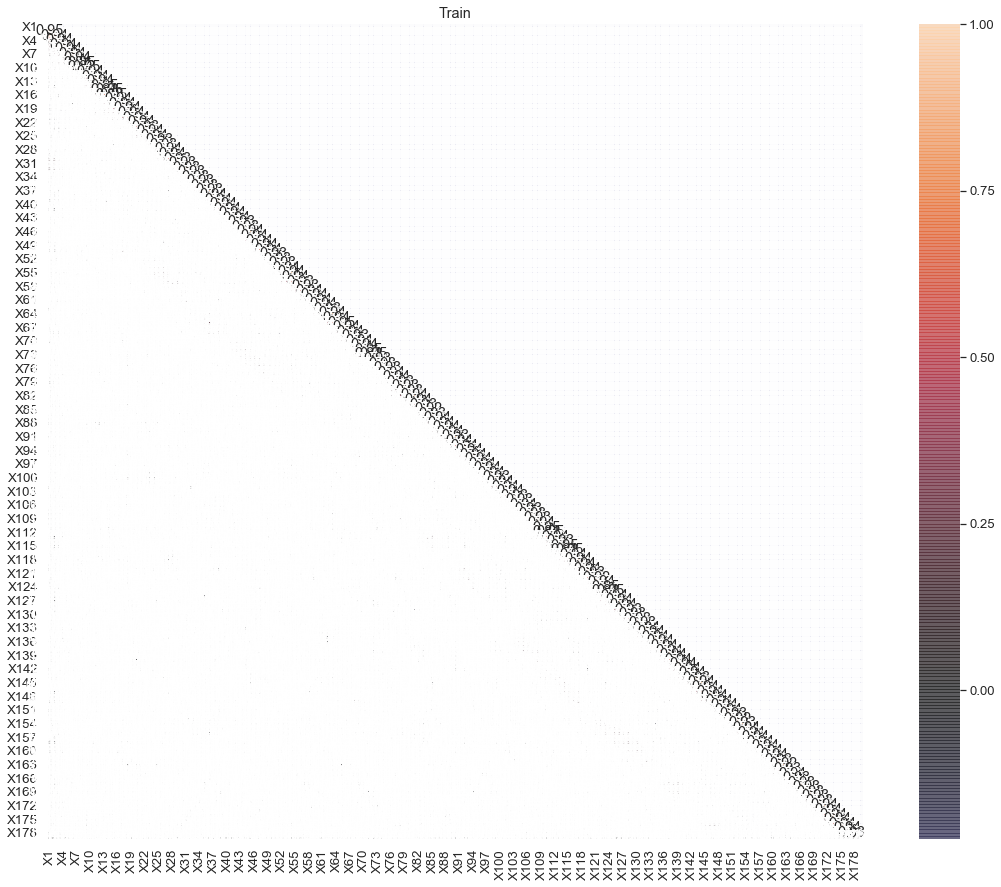

In [9]:
plot_df(train, 'Train')

In [10]:
print(train.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=179)


In [11]:
class_name = input("Chooese the class: ")

Chooese the class: y


In [12]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [13]:
tr_ans = train[class_name]
ts_ans = test[class_name]
class_count = len(tr_ans.unique())
print(class_count)

5


In [14]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [15]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

#결측치 채우기 if 결측치가 ?일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values='?', strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

In [16]:
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
tr_ans = np.array(tr_ans)
ts_ans = np.array(ts_ans)

In [17]:
tr_ans

array([4, 4, 1, ..., 4, 1, 4], dtype=int64)

In [18]:
ts_ans

array([5, 4, 4, ..., 1, 3, 2], dtype=int64)

In [19]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [21]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [22]:
keras_model = KerasClassifier(build_fn=create_model, epochs=256, batch_size=16)

In [23]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,16, 32]
neurons = [32, 64, 128, 256]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [24]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

In [ ]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

In [ ]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

In [ ]:
pred

In [ ]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

In [ ]:
pred

In [ ]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)